In [364]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mda

import string

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\oykuk\anaconda3\lib\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Please click here to see / unsee the code."></form>''')

In [365]:
# Reading the data
data = pd.read_csv('data/speed_dating.csv', encoding='ISO-8859-1')
data.shape

(8378, 195)

In [366]:
data.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  \
0    1  1.0       0    1       1     1     10         7       NaN      4   
1    1  1.0       0    1       1     1     10         7       NaN      3   
2    1  1.0       0    1       1     1     10         7       NaN     10   
3    1  1.0       0    1       1     1     10         7       NaN      5   
4    1  1.0       0    1       1     1     10         7       NaN      7   

   partner   pid  ...  amb2_3  shar2_3  attr3_3  sinc3_3  intel3_3  fun3_3  \
0        1  11.0  ...     NaN      NaN      5.0      7.0       7.0     7.0   
1        2  12.0  ...     NaN      NaN      5.0      7.0       7.0     7.0   
2        3  13.0  ...     NaN      NaN      5.0      7.0       7.0     7.0   
3        4  14.0  ...     NaN      NaN      5.0      7.0       7.0     7.0   
4        5  15.0  ...     NaN      NaN      5.0      7.0       7.0     7.0   

   amb3_3  attr5_3  sinc5_3  intel5_3  fun5_3  amb5_3  
0     7.0      NaN      NaN       NaN     NaN     NaN  
1     7.0      NaN      NaN       NaN     NaN     NaN  
2     7.0      NaN      NaN       NaN     NaN     NaN  
3     7.0      NaN      NaN       NaN     NaN     NaN  
4     7.0      NaN      NaN       NaN     NaN     NaN  

[5 rows x 195 columns]

1. Dropping columns
2. Changing dtypes to numeric
3. Then use Sklearn model to fill an values

In [367]:
pd.set_option('display.max_rows', None)
print(data.dtypes)

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
position      int64
positin1    float64
order         int64
partner       int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
shar_o      float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
field_cd    float64
undergra     object
mn_sat       object
tuition      object
race        float64
imprace     float64
imprelig    float64
from         object
zipcode      object
income       object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64


In [368]:
obj_cols = data.select_dtypes(include='object').columns
print(obj_cols)

Index(['field', 'undergra', 'mn_sat', 'tuition', 'from', 'zipcode', 'income',
       'career'],
      dtype='object')


In [369]:
#Filling field column, we have field_cd column that keeps numeric version of it.
#We will assign the empty ones 18 - Other and drop Field column

data['field_cd'].fillna(18, inplace=True)
data.drop('field', inplace=True, axis=1)

In [370]:
#Undergra column

data['undergra'].fillna('other', inplace=True)

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatiser = WordNetLemmatizer()
    regex_rule = r'[^\w\s]'
    
    preprocessed_text = []
    
    for e in text:
        e = re.sub(regex_rule, " ", e)
        tokens = word_tokenize(e)
    
        filtered_sentence = []
        for w in tokens:
            if w not in stop_words:
                filtered_sentence.append(w)
    
        lemmas = [lemmatiser.lemmatize(token, pos='n').lower() for token in filtered_sentence]
        preprocessed_text.append(" ".join(lemmas))
    
    return preprocessed_text

In [371]:
preprocess_data = preprocess_text(data['undergra'])
data['tokenize_undergra'] = preprocess_data
data["tokenize_undergra"] = data["tokenize_undergra"].astype('category')
data["university"] = data["tokenize_undergra"].cat.codes
data.drop('tokenize_undergra',axis=1, inplace=True)
data.drop('undergra',axis=1, inplace=True)

In [372]:
vectoriser = TfidfVectorizer(analyzer=word_tokenize)
data_tfidf = vectoriser.fit_transform(preprocess_data)

In [373]:
vector_space = vectoriser.get_feature_names()

In [374]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(
    n_components=3,
    doc_topic_prior=0.1,
    topic_word_prior=0.1
)

In [375]:
lda = lda_model.fit(data_tfidf)

In [407]:
for index, topic in enumerate(lda.components_):
    print(f'Top 30 words for Topic #{index}')
    print([vectoriser.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

Top 30 words for Topic #0
['northwestern', 'george', 'emory', 'brandeis', 'beijing', 'mit', 'uma', 'bucknell', 'seas', 'louis', 'st', 'american', 'rice', 'china', 'taiwan', 'connecticut', 'wesleyan', 'vermont', 'stanford', 'delhi', 'smith', 'oxford', 'college', 'princeton', 'washington', 'tufts', 'brown', 'nyu', 'cornell', 'university']


Top 30 words for Topic #1
['oberlin', 'queens', 'de', 'arizona', 'conneticut', 'dartmouth', 'school', 'genova', 'unlv', 'amherst', 'bombay', 'boston', 'new', 'tech', 'warsaw', 'cross', 'holy', 'universidad', 'loyola', 'suny', 'univ', 'barnard', 'texas', 'state', 'georgetown', 'rutgers', 'yale', 'university', 'harvard', 'college']


Top 30 words for Topic #2
['univeristy', 'kansas', 'southwestern', 'rpi', 'columbiau', 'fordham', 'polytechnique', 'penn', 'davis', 'international', 'florida', 'italy', 'southern', 'paris', 'ecole', 'illinois', 'france', 'irvine', 'toronto', 'santa', 'california', 'u', 'college', 'pennsylvania', 'michigan', 'ucla', 'berkele

In [377]:
#Mnsat, tuition and income columns normally numeric values, we will change these columns

data['income'] = pd.to_numeric(data['income'], errors='coerce')
data['mn_sat'] = pd.to_numeric(data['mn_sat'], errors='coerce')
data['tuition'] = pd.to_numeric(data['tuition'], errors='coerce')

In [378]:
all_na_rows = data[data.isna().all(axis=1)]
all_na_rows

Empty DataFrame
Columns: [iid, id, gender, idg, condtn, wave, round, position, positin1, order, partner, pid, match, int_corr, samerace, age_o, race_o, pf_o_att, pf_o_sin, pf_o_int, pf_o_fun, pf_o_amb, pf_o_sha, dec_o, attr_o, sinc_o, intel_o, fun_o, amb_o, shar_o, like_o, prob_o, met_o, age, field_cd, mn_sat, tuition, race, imprace, imprelig, from, zipcode, income, goal, date, go_out, career, career_c, sports, tvsports, exercise, dining, museums, art, hiking, gaming, clubbing, reading, tv, theater, movies, concerts, music, shopping, yoga, exphappy, expnum, attr1_1, sinc1_1, intel1_1, fun1_1, amb1_1, shar1_1, attr4_1, sinc4_1, intel4_1, fun4_1, amb4_1, shar4_1, attr2_1, sinc2_1, intel2_1, fun2_1, amb2_1, shar2_1, attr3_1, sinc3_1, fun3_1, intel3_1, amb3_1, attr5_1, sinc5_1, intel5_1, fun5_1, amb5_1, dec, attr, sinc, intel, fun, ...]
Index: []

[0 rows x 194 columns]

In [379]:
pd.set_option('display.max_rows', None)
null_counts = data.isnull().sum().sort_values(ascending=False)
print(null_counts[null_counts > 0])

income      8378
tuition     8378
mn_sat      8350
num_in_3    7710
numdat_3    6882
expnum      6578
amb7_2      6423
sinc7_2     6423
shar7_2     6404
attr7_2     6394
fun7_2      6394
intel7_2    6394
amb7_3      6362
sinc7_3     6362
attr7_3     6362
intel7_3    6362
shar2_3     6362
fun7_3      6362
shar7_3     6362
amb5_3      6362
fun5_3      6362
intel5_3    6362
sinc5_3     6362
attr5_3     6362
attr4_3     5419
intel2_3    5419
amb2_3      5419
fun2_3      5419
attr2_3     5419
shar4_3     5419
amb4_3      5419
fun4_3      5419
intel4_3    5419
sinc4_3     5419
sinc2_3     5419
them_cal    4404
intel1_3    4404
you_call    4404
attr1_3     4404
sinc1_3     4404
date_3      4404
amb1_3      4404
shar1_3     4404
attr3_3     4404
fun1_3      4404
sinc3_3     4404
intel3_3    4404
fun3_3      4404
amb3_3      4404
amb3_s      4378
attr3_s     4378
sinc3_s     4378
intel3_s    4378
fun3_s      4378
intel1_s    4282
attr1_s     4282
sinc1_s     4282
fun1_s      4282
amb1_s      42

In [380]:
pd.set_option('display.max_rows', None)
list(data.columns)

['iid',
 'id',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field_cd',
 'mn_sat',
 'tuition',
 'race',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'income',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',


In [381]:
drop_list = ['attr1_3','sinc1_3','intel1_3','fun1_3','amb1_3','shar1_3','attr7_3','sinc7_3','intel7_3','fun7_3','amb7_3','shar7_3','attr4_3','sinc4_3','intel4_3','fun4_3','amb4_3','shar4_3','attr2_3',
             'sinc2_3','intel2_3','fun2_3','amb2_3','shar2_3','attr3_3','sinc3_3','intel3_3','fun3_3','amb3_3','attr5_3','sinc5_3','intel5_3','fun5_3','amb5_3','attr7_2','sinc7_2','intel7_2','fun7_2',
             'amb7_2','shar7_2','attr1_2','sinc1_2','intel1_2','fun1_2','amb1_2','shar1_2','attr4_2','sinc4_2','intel4_2','fun4_2','amb4_2','shar4_2','attr2_2','sinc2_2','intel2_2','fun2_2','amb2_2',
             'shar2_2','attr3_2','sinc3_2','intel3_2','fun3_2','amb3_2','attr5_2','sinc5_2','intel5_2','fun5_2','amb5_2','attr1_s','sinc1_s','intel1_s','fun1_s','amb1_s','shar1_s',
             'attr3_s','sinc3_s','intel3_s','fun3_s',
             'amb3_s','attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1','order','iid','id','idg','round','position','positin1','partner','pid','int_corr','career','career_c','income','zipcode','expnum',
             'you_call','them_cal','date_3','numdat_3','num_in_3','from'
            ]

def dropping(df,lst):
    for e in lst:
        df.drop(e, axis=1,inplace=True)
    return df

dropping(data,drop_list)


#Check these columns again, %15 is okay, we can create few diff dfs

gender  condtn  wave  match  samerace  age_o  race_o  pf_o_att  \
0          0       1     1      0         0   27.0     2.0     35.00   
1          0       1     1      0         0   22.0     2.0     60.00   
2          0       1     1      1         1   22.0     4.0     19.00   
3          0       1     1      1         0   23.0     2.0     30.00   
4          0       1     1      1         0   24.0     3.0     30.00   
5          0       1     1      0         0   25.0     2.0     50.00   
6          0       1     1      0         0   30.0     2.0     35.00   
7          0       1     1      0         0   27.0     2.0     33.33   
8          0       1     1      1         0   28.0     2.0     50.00   
9          0       1     1      0         0   24.0     2.0    100.00   
10         0       1     1      0         1   27.0     2.0     35.00   
11         0       1     1      0         1   22.0     2.0     60.00   
12         0       1     1      0         0   22.0     4.0     19.00   
13         0       1     1      1         1   23.0     2.0     30.00   
14         0       1     1      0         0   24.0     3.0     30.00   
15         0       1     1      0         1   25.0     2.0     50.00   
16         0       1     1      0         1   30.0     2.0     35.00   
17         0       1     1      0         1   27.0     2.0     33.33   
18         0       1     1      1         1   28.0     2.0     50.00   
19         0       1     1      0         1   24.0     2.0    100.00   
20         0       1     1      0         1   27.0     2.0     35.00   
21         0       1     1      0         1   22.0     2.0     60.00   
22         0       1     1      0         0   22.0     4.0     19.00   
23         0       1     1      0         1   23.0     2.0     30.00   
24         0       1     1      0         0   24.0     3.0     30.00   
25         0       1     1      0         1   25.0     2.0     50.00   
26         0       1     1      0         1   30.0     2.0     35.00   
27         0       1     1      0         1   27.0     2.0     33.33   
28         0       1     1      0         1   28.0     2.0     50.00   
29         0       1     1      0         1   24.0     2.0    100.00   
30         0       1     1      0         1   27.0     2.0     35.00   
31         0       1     1      0         1   22.0     2.0     60.00   
32         0       1     1      0         0   22.0     4.0     19.00   
33         0       1     1      1         1   23.0     2.0     30.00   
34         0       1     1      0         0   24.0     3.0     30.00   
35         0       1     1      0         1   25.0     2.0     50.00   
36         0       1     1      0         1   30.0     2.0     35.00   
37         0       1     1      0         1   27.0     2.0     33.33   
38         0       1     1      1         1   28.0     2.0     50.00   
39         0       1     1      0         1   24.0     2.0    100.00   
40         0       1     1      0         1   27.0     2.0     35.00   
41         0       1     1      0         1   22.0     2.0     60.00   
42         0       1     1      0         0   22.0     4.0     19.00   
43         0       1     1      1         1   23.0     2.0     30.00   
44         0       1     1      0         0   24.0     3.0     30.00   
45         0       1     1      0         1   25.0     2.0     50.00   
46         0       1     1      0         1   30.0     2.0     35.00   
47         0       1     1      0         1   27.0     2.0     33.33   
48         0       1     1      1         1   28.0     2.0     50.00   
49         0       1     1      0         1   24.0     2.0    100.00   
50         0       1     1      0         0   27.0     2.0     35.00   
51         0       1     1      0         0   22.0     2.0     60.00   
52         0       1     1      0         1   22.0     4.0     19.00   
53         0       1     1      1         0   23.0     2.0     30.00   
54         0       1     1      0         0   

In [382]:
data.columns

Index(['gender', 'condtn', 'wave', 'match', 'samerace', 'age_o', 'race_o',
       'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha',
       'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o',
       'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'mn_sat', 'tuition',
       'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'sports',
       'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming',
       'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music',
       'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1',
       'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1',
       'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1',
       'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1',
       'amb5_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like',
       'prob', 'met', 'match_es', 'satis_2', 'length', 'numdat_2',
       'university'],
      dt

In [383]:
data.head()

gender  condtn  wave  match  samerace  age_o  race_o  pf_o_att  pf_o_sin  \
0       0       1     1      0         0   27.0     2.0      35.0      20.0   
1       0       1     1      0         0   22.0     2.0      60.0       0.0   
2       0       1     1      1         1   22.0     4.0      19.0      18.0   
3       0       1     1      1         0   23.0     2.0      30.0       5.0   
4       0       1     1      1         0   24.0     3.0      30.0      10.0   

   pf_o_int  pf_o_fun  pf_o_amb  ...  intel  fun  amb  shar  like  prob  met  \
0      20.0      20.0       0.0  ...    7.0  7.0  6.0   5.0   7.0   6.0  2.0   
1       0.0      40.0       0.0  ...    7.0  8.0  5.0   6.0   7.0   5.0  1.0   
2      19.0      18.0      14.0  ...    9.0  8.0  5.0   7.0   7.0   NaN  1.0   
3      15.0      40.0       5.0  ...    8.0  7.0  6.0   8.0   7.0   6.0  2.0   
4      20.0      10.0      10.0  ...    7.0  7.0  6.0   6.0   6.0   6.0  2.0   

   match_es  satis_2  length  numdat_2  university  
0       4.0      6.0     2.0       1.0           0  
1       4.0      6.0     2.0       1.0           0  
2       4.0      6.0     2.0       1.0           0  
3       4.0      6.0     2.0       1.0           0  
4       4.0      6.0     2.0       1.0           0  

[5 rows x 88 columns]

In [384]:
scaler = MinMaxScaler()

scaler_list = ['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1','attr2_1','sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1',
              'attr3_1','sinc3_1','intel3_1','fun3_1','amb3_1','attr5_1','sinc5_1','intel5_1','fun5_1','amb5_1']

def scalling(lst,df):
    for e in lst:
        e_standardized = scaler.fit_transform(df[e].values.reshape(-1, 1))
        df[e] = e_standardized
        
scalling(lst=scaler_list, df=data)     

In [385]:
regs = [BayesianRidge(),KNeighborsRegressor(),LinearRegression(),RandomForestRegressor()]
data = data.dropna(axis=1, how='all')

def generating_new_df(df):
    df_complete = data.dropna()
    df_missing = df_complete.copy()
    for col in df_missing.columns:
        df_missing.loc[df_missing.sample(frac=0.1).index, col] = np.nan
    return df_complete, df_missing

# try only with columns that have missing values
# different estimators, explain imputers
# we can try with different versions

In [386]:
def generating_new_df(df):
    df_complete = data.dropna()
    df_missing = df_complete.copy()
    for col in df_missing.columns:
        df_missing.loc[df_missing.sample(frac=0.1).index, col] = np.nan
    return df_complete, df_missing

In [387]:
df_complete, df_missing = generating_new_df(data)

In [388]:
def imputing(df_missing,df_complete,est):
    for e in est:
        imputer = IterativeImputer(estimator=e, max_iter=10, random_state=42)
        imputer.fit(df_missing)        
        data_imputed = pd.DataFrame(imputer.transform(df_missing), columns=df_missing.columns)
        
        mae = mean_absolute_error(df_complete, data_imputed)
        rmse = mean_squared_error(df_complete, data_imputed, squared=False)
        r2 = r2_score(df_complete, data_imputed,)
        
        print(f'MAE for {e}: {mae:.2f}')
        print(f'RMSE for {e}: {rmse:.2f}')
        print(f'R2 for {e}: {r2:.2f}')

In [389]:
imputing(df_missing,df_complete, regs)

MAE for BayesianRidge(): 0.13
RMSE for BayesianRidge(): 0.43
R2 for BayesianRidge(): 0.89
MAE for KNeighborsRegressor(): 0.12
RMSE for KNeighborsRegressor(): 0.43
R2 for KNeighborsRegressor(): 0.93
MAE for LinearRegression(): 0.19
RMSE for LinearRegression(): 0.62
R2 for LinearRegression(): 0.57
MAE for RandomForestRegressor(): 0.09
RMSE for RandomForestRegressor(): 0.32
R2 for RandomForestRegressor(): 0.93


In [390]:
imputer = IterativeImputer(KNeighborsRegressor(), max_iter=10, random_state=42)
imputer.fit(data)
data_imputed = pd.DataFrame(imputer.transform(data), columns=data.columns)
data.head()

IterativeImputer(estimator=KNeighborsRegressor(), random_state=42)

gender  condtn  wave  match  samerace  age_o  race_o  pf_o_att  pf_o_sin  \
0       0       1     1      0         0   27.0     2.0      35.0      20.0   
1       0       1     1      0         0   22.0     2.0      60.0       0.0   
2       0       1     1      1         1   22.0     4.0      19.0      18.0   
3       0       1     1      1         0   23.0     2.0      30.0       5.0   
4       0       1     1      1         0   24.0     3.0      30.0      10.0   

   pf_o_int  pf_o_fun  pf_o_amb  ...  intel  fun  amb  shar  like  prob  met  \
0      20.0      20.0       0.0  ...    7.0  7.0  6.0   5.0   7.0   6.0  2.0   
1       0.0      40.0       0.0  ...    7.0  8.0  5.0   6.0   7.0   5.0  1.0   
2      19.0      18.0      14.0  ...    9.0  8.0  5.0   7.0   7.0   NaN  1.0   
3      15.0      40.0       5.0  ...    8.0  7.0  6.0   8.0   7.0   6.0  2.0   
4      20.0      10.0      10.0  ...    7.0  7.0  6.0   6.0   6.0   6.0  2.0   

   match_es  satis_2  length  numdat_2  university  
0       4.0      6.0     2.0       1.0           0  
1       4.0      6.0     2.0       1.0           0  
2       4.0      6.0     2.0       1.0           0  
3       4.0      6.0     2.0       1.0           0  
4       4.0      6.0     2.0       1.0           0  

[5 rows x 87 columns]

We are filling NA values using SKlearn imputers. We checked few different imputers to understand which one is performing better.

Even though Random Forest worked best, for computational reasons we will go with KNearest since the difference is also not so big.

# Eda

In [391]:
correlation_matrix = data_imputed.corr()
match_correlations = correlation_matrix['match']
most_positively_correlated = match_correlations.sort_values(ascending=False)
most_negatively_correlated = match_correlations.sort_values(ascending=True)
print(most_positively_correlated.head())
print(most_negatively_correlated.head())

match     1.000000
dec_o     0.522326
dec       0.521943
like_o    0.304207
like      0.303397
Name: match, dtype: float64
met_o      -0.106427
date       -0.064924
go_out     -0.061561
shar1_1    -0.048419
pf_o_sha   -0.047891
Name: match, dtype: float64


In [392]:
other_preferences = ['age_o','race_o','pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']

In [393]:
data_imputed.describe().T

count        mean        std    min         25%         50%  \
gender      8378.0    0.500597   0.500029    0.0    0.000000    1.000000   
condtn      8378.0    1.828837   0.376673    1.0    2.000000    2.000000   
wave        8378.0   11.350919   5.995903    1.0    7.000000   11.000000   
match       8378.0    0.164717   0.370947    0.0    0.000000    0.000000   
samerace    8378.0    0.395799   0.489051    0.0    0.000000    0.000000   
age_o       8378.0   26.348603   3.550434   18.0   24.000000   26.000000   
race_o      8378.0    2.758057   1.226504    1.0    2.000000    2.000000   
pf_o_att    8378.0   22.440286  12.518434    0.0   15.000000   20.000000   
pf_o_sin    8378.0   17.393591   7.011158    0.0   15.000000   18.180000   
pf_o_int    8378.0   20.273287   6.749741    0.0   17.650000   20.000000   
pf_o_fun    8378.0   17.456874   6.059773    0.0   15.000000   18.000000   
pf_o_amb    8378.0   10.716154   6.124650    0.0    5.000000   10.000000   
pf_o_sha    8378.0   11.819606   6.339480    0.0    8.632500   10.640000   
dec_o       8378.0    0.419551   0.493515    0.0    0.000000    0.000000   
attr_o      8378.0    6.186488   1.935044    0.0    5.000000    6.000000   
sinc_o      8378.0    7.177465   1.718162    0.0    6.000000    7.000000   
intel_o     8378.0    7.366543   1.529503    0.0    6.200000    7.000000   
fun_o       8378.0    6.406063   1.926628    0.0    5.000000    7.000000   
amb_o       8378.0    6.785951   1.735048    0.0    6.000000    7.000000   
shar_o      8378.0    5.484101   2.057955    0.0    4.000000    5.800000   
like_o      8378.0    6.131165   1.822589    0.0    5.000000    6.000000   
prob_o      8378.0    5.210575   2.100818    0.0    4.000000    5.000000   
met_o       8378.0    1.960802   0.241619    1.0    2.000000    2.000000   
age         8378.0   26.356052   3.557142   18.0   24.000000   26.000000   
field_cd    8378.0    7.763667   3.876481    1.0    5.000000    8.000000   
mn_sat      8378.0  933.806445  33.245142  914.0  914.000000  914.000000   
race        8378.0    2.759036   1.228826    1.0    2.000000    2.000000   
imprace     8378.0    3.795846   2.841118    0.0    1.000000    3.000000   
imprelig    8378.0    3.670399   2.805563    1.0    1.000000    3.000000   
goal        8378.0    2.118501   1.401684    1.0    1.000000    2.000000   
date        8378.0    5.006827   1.438538    1.0    4.000000    5.000000   
go_out      8378.0    2.160730   1.103038    1.0    1.000000    2.000000   
sports      8378.0    6.416758   2.612155    1.0    4.400000    7.000000   
tvsports    8378.0    4.574147   2.793016    1.0    2.000000    4.000000   
exercise    8378.0    6.251635   2.412762    1.0    5.000000    6.800000   
dining      8378.0    7.789234   1.748349    1.0    7.000000    8.000000   
museums     8378.0    6.990380   2.045125    0.0    6.000000    7.000000   
art         8378.0    6.719503   2.255605    0.0    5.000000    7.000000   
hiking      8378.0    5.745094   2.562628    0.0    4.000000    6.000000   
gaming      8378.0    3.886202   2.613754    0.0    2.000000    3.000000   
clubbing    8378.0    5.753235   2.493378    0.0    4.000000    6.000000   
reading     8378.0    7.676582   2.000837    1.0    7.000000    8.000000   
tv          8378.0    5.314419   2.522599    1.0    3.000000    6.000000   
theater     8378.0    6.787061   2.230577    0.0    5.000000    7.000000   
movies      8378.0    7.924421   1.695572    0.0    7.000000    8.000000   
concerts    8378.0    6.833683   2.149729    0.0    5.000000    7.000000   
music       8378.0    7.858272   1.787399    1.0    7.000000    8.000000   
shopping    8378.0    5.642015   2.604898    1.0    4.000000    6.000000   
yoga        8378.0    4.352471   2.713477    0.0    2.000000    4.000000   
exphappy    8378.0    5.533325   1.726469    1.0    5.000000    6.000000   
attr1_1     8378.0    0.224645   0.125464    0.0    0.150000    0.200000   
sinc1_1     8378.0    0.289971   0.117023    0.0    0.250000 

<AxesSubplot:xlabel='match', ylabel='Count'>

0.0    6998
1.0    1380
Name: match, dtype: int64

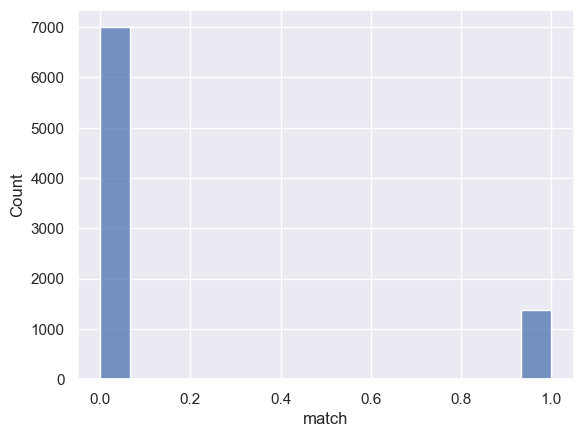

In [394]:
sns.histplot(data=data, x='match')
data_imputed['match'].value_counts()
# Really unbalanced match count, it looks slike people cant find what they are looking for

<AxesSubplot:xlabel='gender', ylabel='Count'>

1.0    4194
0.0    4184
Name: gender, dtype: int64

-0.0005300447380544526

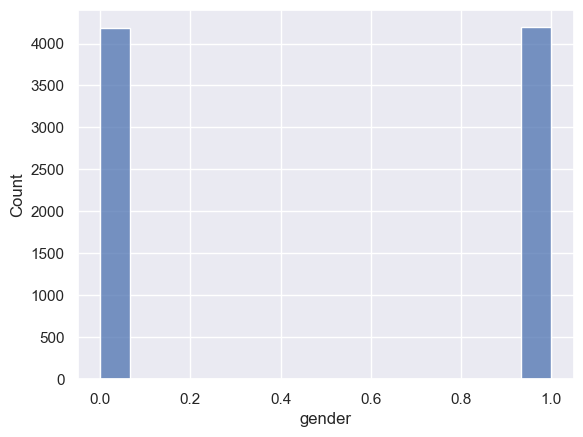

In [395]:
sns.histplot(data=data, x='gender')
data_imputed['gender'].value_counts()
data['match'].corr(data['gender'])
# Balanced gender

<AxesSubplot:xlabel='condtn', ylabel='Count'>

2.0    6944
1.0    1434
Name: condtn, dtype: int64

-0.04596016869147831

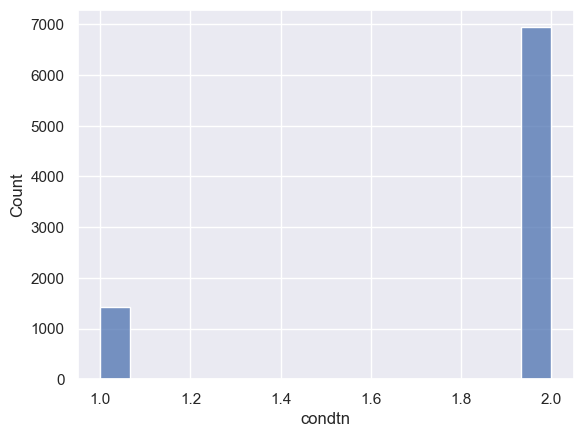

In [396]:
sns.histplot(data=data, x='condtn')
data_imputed['condtn'].value_counts()
data['match'].corr(data['condtn'])
# Unbalanced condt, most of the people thinks they have extensive choices but it doesn't look correlated with match decission

<AxesSubplot:xlabel='samerace', ylabel='Count'>

0.0    5062
1.0    3316
Name: samerace, dtype: int64

0.013027700458983544

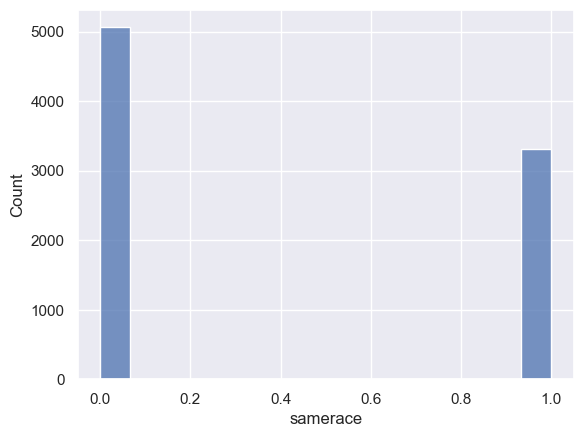

In [397]:
sns.histplot(data=data, x='samerace')
data_imputed['samerace'].value_counts()
data['match'].corr(data['samerace'])

In [398]:
data_imputed['age'].max()

55.0

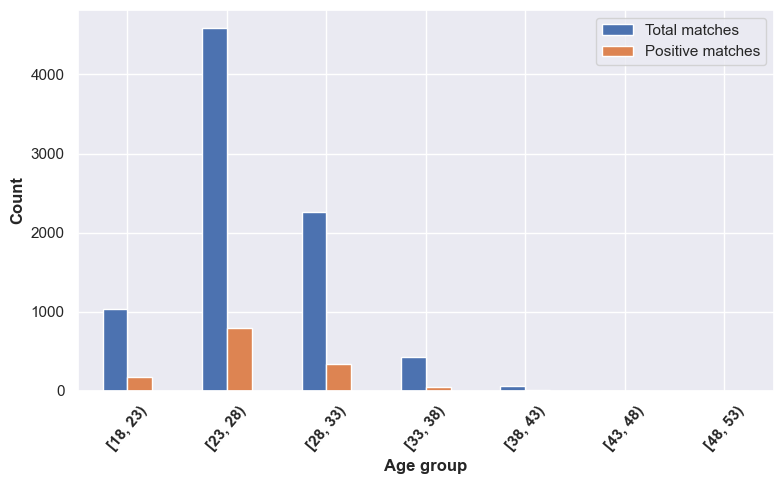

In [399]:
#Oyku's graph
age_df = data_imputed.groupby('age').agg({'match': ['count', 'sum']})
age_df.columns = ['total_match','positive_match']
age_df = age_df.reset_index()
age_df['age_group'] = pd.cut(age_df['age'], bins=np.arange(18, 56, 5), right=False)

age_group_df = age_df.groupby('age_group').sum()

fig, ax = plt.subplots()
age_group_df.plot.bar(y=['total_match', 'positive_match'], rot=50, ax=ax)
ax.set_xlabel('Age group',fontweight='bold')
ax.set_ylabel('Count',fontweight='bold')
ax.legend(['Total matches', 'Positive matches'])
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
sns.set(font_scale=1)

# Adjust layout
fig.set_size_inches(8, 5)
plt.tight_layout()
plt.show();

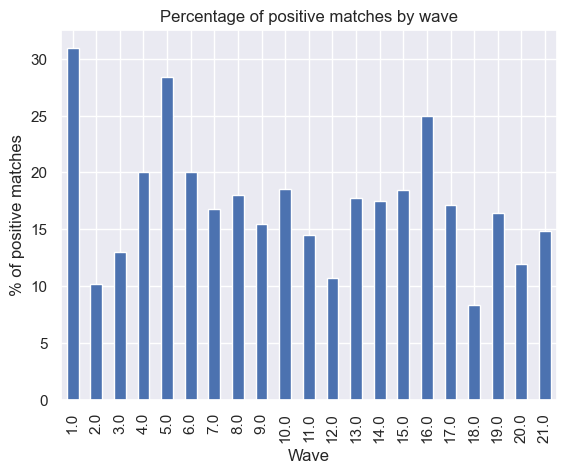

In [400]:
wave_m=fix1_match.groupby(['wave', 'match']).size().unstack()
wave_m['positive_match_pct'] = wave_m.apply(lambda row: ((row[1] / (row[1]+row[0]))*100), axis=1)

ax = wave_m.plot.bar(y='positive_match_pct', legend=False)
ax.set_xlabel('Wave')
ax.set_ylabel('% of positive matches')
ax.set_title('Percentage of positive matches by wave')
plt.show();


# Add Total and Positive Matches

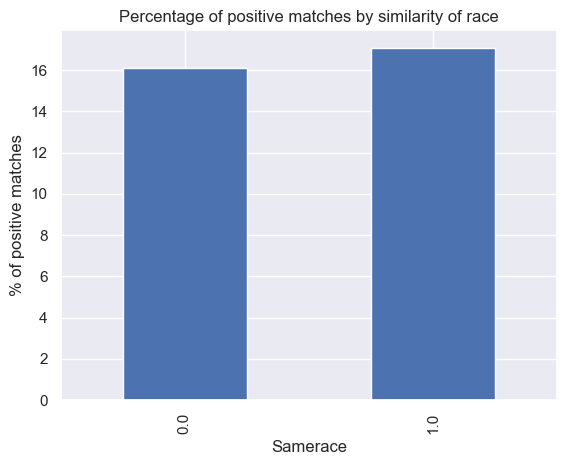

In [401]:
samerace_m=fix1_match.groupby(['samerace', 'match']).size().unstack()
samerace_m['positive_match_pct'] = samerace_m.apply(lambda row: ((row[1] / (row[1]+row[0]))*100), axis=1)

ax = samerace_m.plot.bar(y='positive_match_pct', legend=False)
ax.set_xlabel('Samerace')
ax.set_ylabel('% of positive matches')
ax.set_title('Percentage of positive matches by similarity of race')
plt.show();


#When to delete data - ask Filipa?

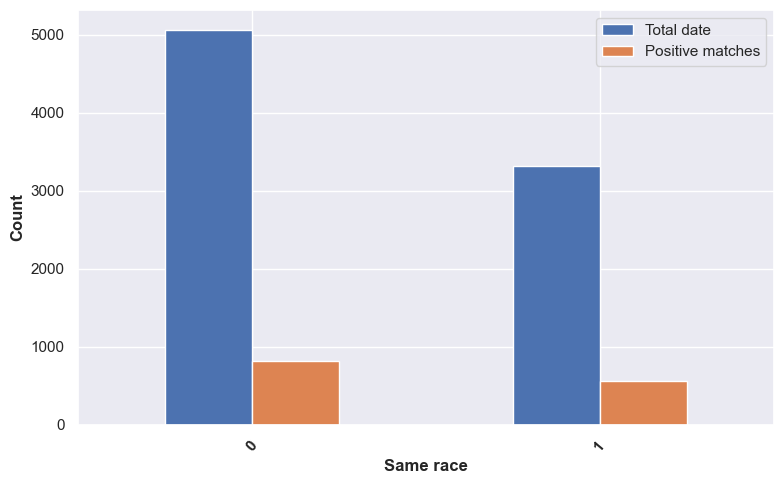

In [402]:
#Oyku's graph
samerace_df = data_imputed.groupby('samerace').agg({'match': ['count', 'sum']})
samerace_df.columns = ['total_data','positive_match']
samerace_df = samerace_df.reset_index()

fig, ax = plt.subplots()
samerace_df.plot.bar(y=['total_data', 'positive_match'], rot=50, ax=ax)
ax.set_xlabel('Same race',fontweight='bold')
ax.set_ylabel('Count',fontweight='bold')
ax.legend(['Total date', 'Positive matches'])
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
sns.set(font_scale=1)

# Adjust layout
fig.set_size_inches(8, 5)
plt.tight_layout()
plt.show();

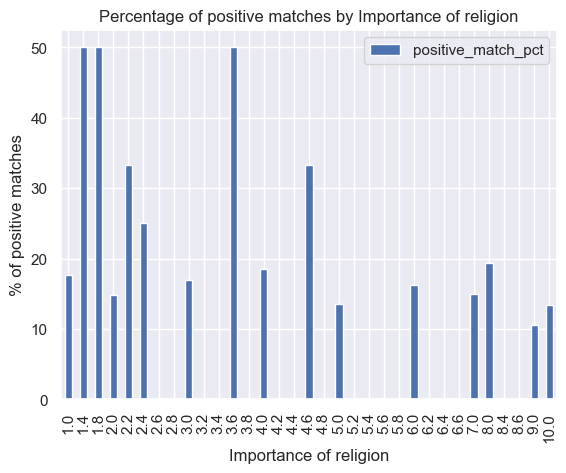

In [403]:
imprelig_m=fix1_match.groupby(['imprelig', 'match']).size().unstack()
imprelig_m['positive_match_pct'] = imprelig_m.apply(lambda row: ((row[1] / (row[1]+row[0]))*100), axis=1)

ax = imprelig_m.plot.bar(y='positive_match_pct')
ax.set_xlabel('Importance of religion')
ax.set_ylabel('% of positive matches')
ax.set_title('Percentage of positive matches by Importance of religion')
plt.show();

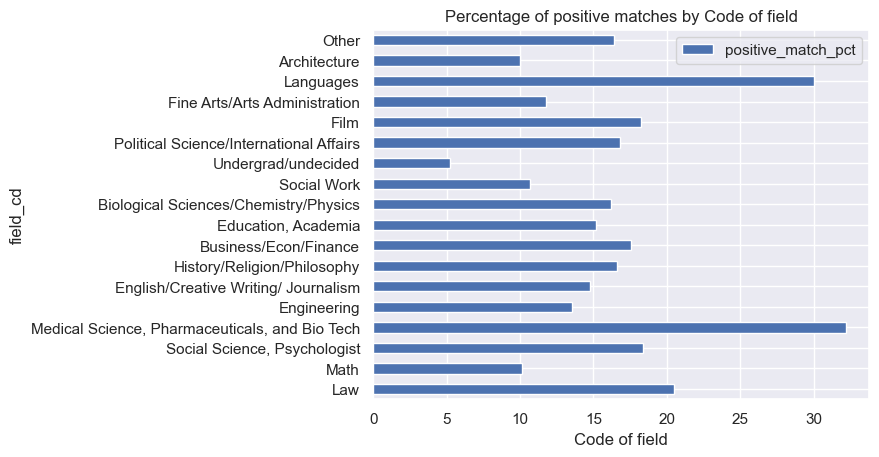

In [404]:
field_cd_m=fix1_match.groupby(['field_cd', 'match']).size().unstack()
field_cd_m['positive_match_pct'] = field_cd_m.apply(lambda row: ((row[1] / (row[1]+row[0]))*100), axis=1)

new_index = {1.0: 'Law', 2.0: 'Math',3.0:'Social Science, Psychologist',
4.0:'Medical Science, Pharmaceuticals, and Bio Tech' ,5.0:'Engineering',
6.0:'English/Creative Writing/ Journalism', 
7.0: 'History/Religion/Philosophy', 8.0: 'Business/Econ/Finance', 
9.0: 'Education, Academia', 10.0: 'Biological Sciences/Chemistry/Physics',
11.0: 'Social Work', 12.0: 'Undergrad/undecided', 
13.0: 'Political Science/International Affairs', 14.0: 'Film',
15.0: 'Fine Arts/Arts Administration', 16.0: 'Languages',
17.0: 'Architecture',18.0: 'Other'
}
field_cd_m = field_cd_m.rename(index=new_index)

ax = field_cd_m.plot.barh(y='positive_match_pct')
ax.set_xlabel('Code of field')
ax.set_title('Percentage of positive matches by Code of field')
plt.show();

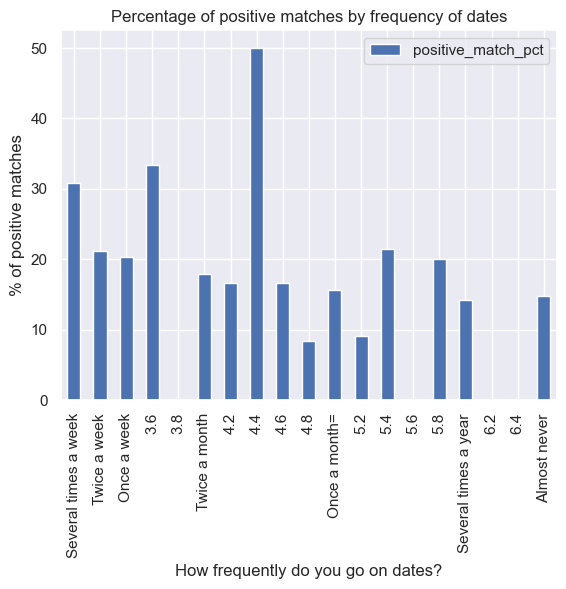

In [405]:
date_m=fix1_match.groupby(['date', 'match']).size().unstack()
date_m['positive_match_pct'] = date_m.apply(lambda row: ((row[1] / (row[1]+row[0]))*100), axis=1)

new_index = {1.0: 'Several times a week', 2.0: 'Twice a week',3.0:'Once a week',
4.0:'Twice a month' ,5.0:'Once a month=',
6.0:'Several times a year', 
7.0: 'Almost never'
}
date_m = date_m.rename(index=new_index)

ax = date_m.plot.bar(y='positive_match_pct')
ax.set_xlabel('How frequently do you go on dates?')
ax.set_ylabel('% of positive matches')
ax.set_title('Percentage of positive matches by frequency of dates')
plt.show();

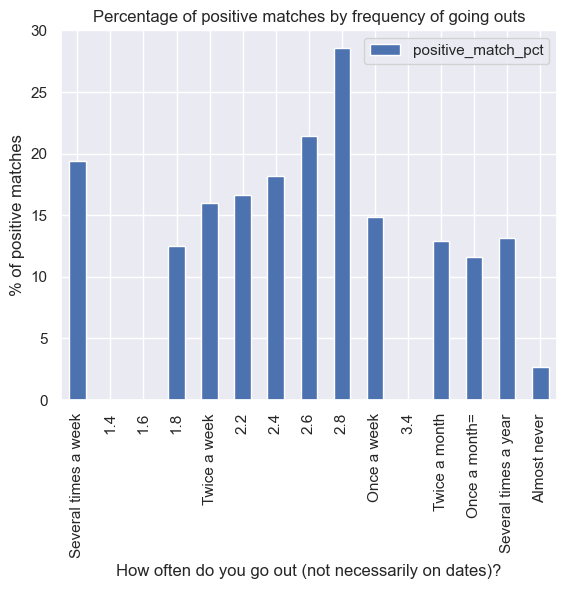

In [406]:
go_out_m=fix1_match.groupby(['go_out', 'match']).size().unstack()
go_out_m['positive_match_pct'] = go_out_m.apply(lambda row: ((row[1] / (row[1]+row[0]))*100), axis=1)

new_index = {1.0: 'Several times a week', 2.0: 'Twice a week',3.0:'Once a week',
4.0:'Twice a month' ,5.0:'Once a month=',
6.0:'Several times a year', 
7.0: 'Almost never'
}
go_out_m = go_out_m.rename(index=new_index)

ax = go_out_m.plot.bar(y='positive_match_pct')
ax.set_xlabel('How often do you go out (not necessarily on dates)?')
ax.set_ylabel('% of positive matches')
ax.set_title('Percentage of positive matches by frequency of going outs')
plt.show();